In [1]:
import sys
sys.path.append("../src")
import lightbeam
from lightbeam.mesh import RectMesh3D, RectMesh2D
import lightbeam.optics as optics
import lightbeam.optics2 as optics2
from lightbeam import LPmodes
from lightbeam.misc import normalize
from lightbeam.prop import Prop3D

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# wavelength: 1.5 um
# background (capillary) index: 1.4345
# SM cladding index: 1.44
# SM core index: 1.4522895
# T (taper ratio): 10
# Cladding output diameter: 328 um
# Cladding input diameter: 32.8 um (ie 328/T)
# SM core diam: 6.5 um
# SM core separation (on hex grid): 60 um

wl = 1.5 # um
njack = 1.4345
nclad = 1.44
ncore = 1.4522895
mm_rjack = 76.3 # um
mm_rclad = 32.8 # um
taper_ratio = 10
sm_rcore = 6.5 # um
mm_rjack = 76.3 # um
sm_rclad = 32.8 # um
sm_seperation_initial = 2*sm_rcore # um
sm_seperation_final = 2*60 # um
# # what is MM core radius assuming 2 um from http://dx.doi.org/10.1364/AOP.7.000107, 
# # measurements of figure 6 c): 570, 105
# mm_rcore = 28 # um ROUGH GUESS
sm_offset = 100
sm_ex = 5100
scale_func = None

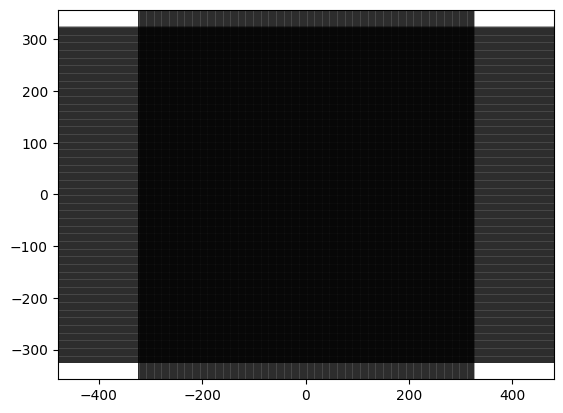

In [4]:
xw = 600 #um
yw= 600 #um
zw = 5100 #um
num_PML = 50 #grid units

ds = 0.5 #um
dz = 5 #um

_mesh = RectMesh3D(xw,yw,zw,ds,dz,num_PML)
_mesh.xy.plot_mesh()

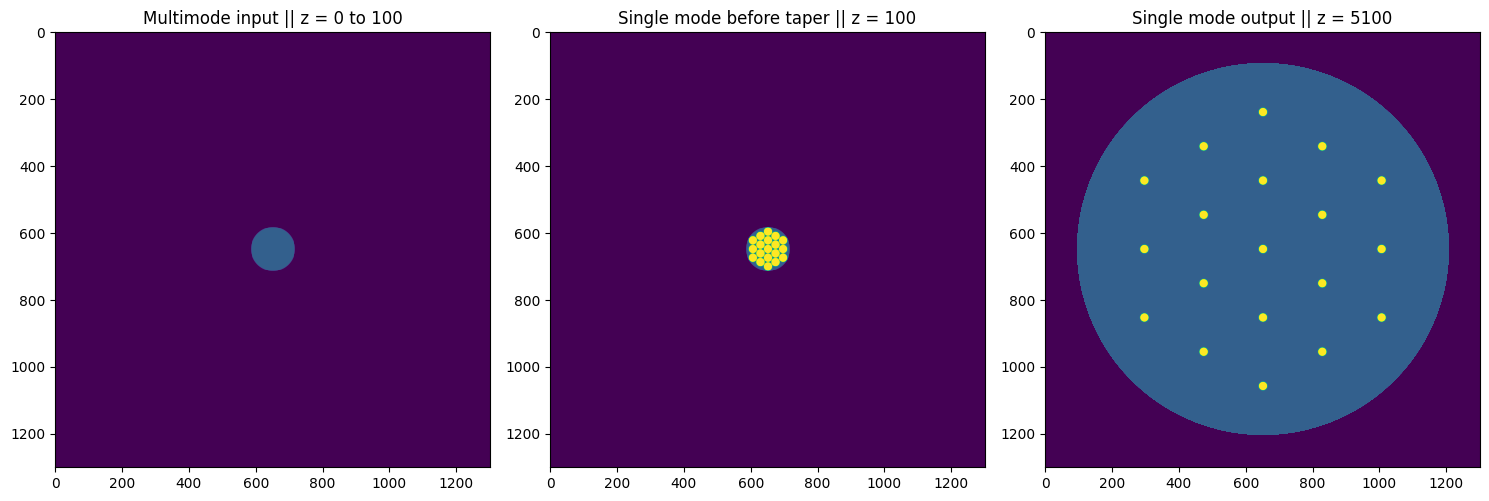

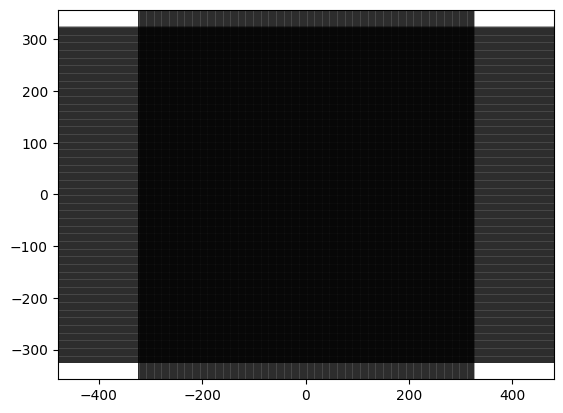

In [32]:
lant19_ipos = optics2.lant19.get_19port_positions(core_spacing=sm_seperation_initial)
lant19_fpos = optics2.lant19.get_19port_positions(core_spacing=sm_seperation_final)

#lant19pos = optics.lant19.get_19port_positions(core_spacing=sm_rcore)
clad_mm = optics.scaled_cyl([0,0],mm_rclad,sm_offset,nclad,njack,0,scale_func=scale_func,final_scale=1)
clad_sm = optics.scaled_cyl([0,0],sm_rclad,sm_ex,nclad,njack,sm_offset,scale_func=scale_func,final_scale=taper_ratio)
elmnts = [clad_mm, clad_sm]

for i in range(0,len(lant19_ipos)):
    core = optics2.scaled_cyl(xy=lant19_ipos[i],fxy=lant19_fpos[i] ,r = sm_rcore,z_ex = sm_ex,n = ncore,nb = nclad,z_offset=sm_offset,scale_func=scale_func,final_scale=1)
    elmnts.append(core)

lant19 = optics.OpticSys(elmnts,njack)
lant19.set_sampling(_mesh.xy)

out = np.zeros(_mesh.xy.shape)

# Create the figure and axes for the subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Generate the first subplot
lant19.set_IORsq(out, 0)
# axs[0].set_xlim([300,500])
# axs[0].set_ylim([300,500])
axs[0].imshow(out, vmin=njack*njack, vmax=ncore*ncore)
axs[0].set_title("Multimode input || z = 0 to 100")

# Generate the second subplot
lant19.set_IORsq(out, 1000)
# axs[1].set_xlim([300,500])
# axs[1].set_ylim([300,500])
axs[1].imshow(out, vmin=njack*njack, vmax=ncore*ncore)
axs[1].set_title("Single mode before taper || z = 100")

# Generate the third subplot
lant19.set_IORsq(out, 6000)
axs[2].imshow(out, vmin=njack*njack, vmax=ncore*ncore)
axs[2].set_title("Single mode output || z = 5100")
# Display the figure with the subplots
plt.tight_layout()
plt.show()

_mesh.xy.plot_mesh()

input field: 


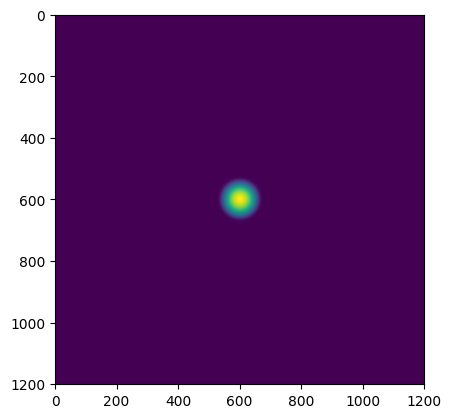

In [29]:
import lightbeam.LPmodes as LPmodes
from lightbeam.misc import normalize

xg, yg = _mesh.xg[num_PML:-num_PML,num_PML:-num_PML],_mesh.yg[num_PML:-num_PML,num_PML:-num_PML]
u0 = normalize(LPmodes.lpfield(xg,yg,0,1,mm_rclad,wl,nclad,njack))

print("input field: ")
plt.imshow(np.abs(u0))
plt.show()

#### propagation ####

from lightbeam.prop import Prop3D

prop = Prop3D(wl,_mesh,lant19,nclad)

In [25]:
u0 = prop.prop2end_uniform(u0)

input power:  0.9999999999999994
propagating field...
initial shape:  (1401, 1401)


KeyboardInterrupt: 

output field: 


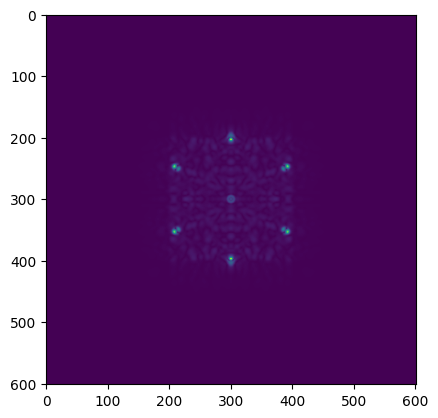

In [8]:

print("output field: ")
plt.imshow(np.abs(u0))
plt.show()

**Seperating the light propogation between the different meshes for each object**


In [80]:
# wavelength: 1.5 um
# background (capillary) index: 1.4345
# SM cladding index: 1.44
# SM core index: 1.4522895
# T (taper ratio): 10
# Cladding output diameter: 328 um
# Cladding input diameter: 32.8 um (ie 328/T)
# SM core diam: 6.5 um
# SM core separation (on hex grid): 60 um

wl = 1.5 # um
njack = 1.4345
nclad = 1.44
ncore = 1.4522895
mm_rjack = 76.3 # um
mm_rclad = 32.8 # um
taper_ratio = 10
sm_rcore = 6.5 # um
mm_rjack = 76.3 # um
sm_rclad = 32.8 # um
sm_seperation_initial = 2*sm_rcore # um
sm_seperation_final = 2*60 # um TEMP

# # what is MM core radius assuming 2 um from http://dx.doi.org/10.1364/AOP.7.000107, 
# # measurements of figure 6 c): 570, 105
# mm_rcore = 28 # um ROUGH GUESS
sm_offset = 100
sm_ex = 5100
scale_func = None
ref_val = 2e-4
l = 0
m = 1

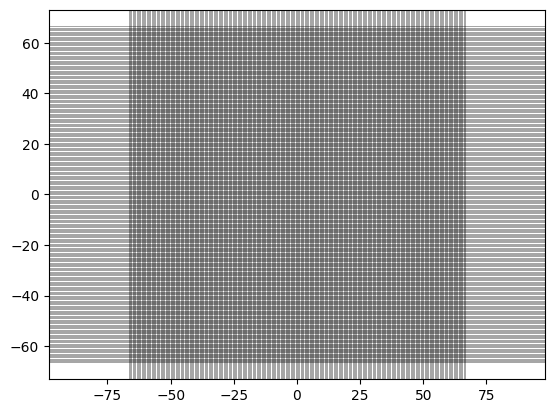

xg shape: (267, 267)
yg shape: (267, 267)
u0 shape: (267, 267)
input field: 


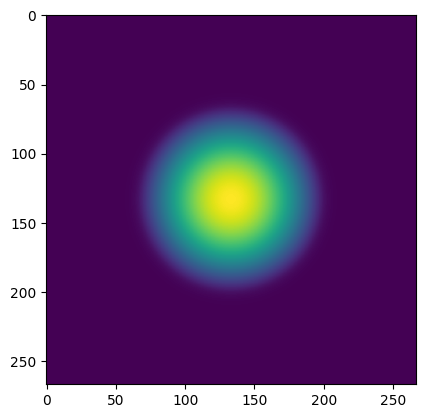

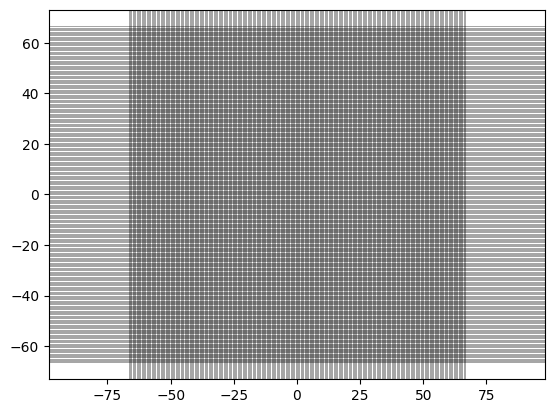

input power:  0.9999999999999999
propagating field...
initial shape:  (267, 267)
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
final total power 0.9999997442619668
'prop2end_uniform'  8.1694 s
output field: 


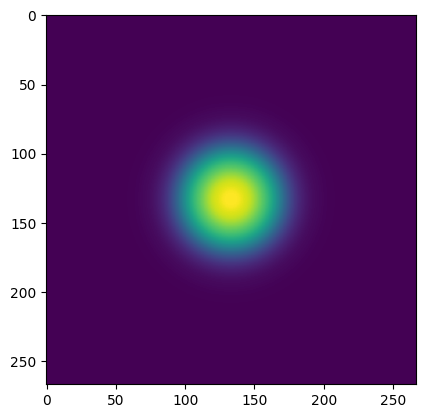

In [81]:
ds = 0.5 #um
dz = 0.5 #um
iw = 100 #um
zw = sm_offset #um
num_PML = round(mm_rclad) #grid units

_mesh = RectMesh3D(iw,iw,zw,ds,dz,num_PML)
_mesh.xy.plot_mesh()

clad_mm = optics.scaled_cyl([0,0],mm_rclad,sm_offset,nclad,njack,0,scale_func=scale_func,final_scale=1)

mm = optics.OpticSys([clad_mm],njack)

xg, yg = _mesh.xg,_mesh.yg
u0 = normalize(LPmodes.lpfield(xg,yg,l,m,mm_rclad,wl,nclad,njack))
print(f"xg shape: {xg.shape}")
print(f"yg shape: {yg.shape}")
print(f"u0 shape: {u0.shape}")

print("input field: ")
plt.imshow(np.abs(u0))
plt.show()
# _mesh.xy.refine_base(u0,ref_val)
# mm.set_sampling(_mesh.xy)
_mesh.xy.plot_mesh()
prop = Prop3D(wl,_mesh,mm,njack)
u0 = prop.prop2end_uniform(u0)
print("output field: ")
plt.imshow(np.abs(u0))
plt.show()

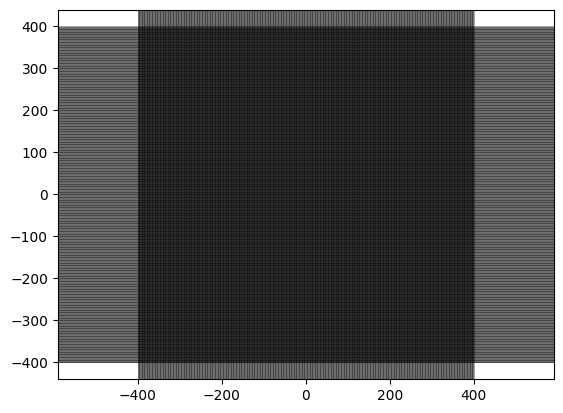

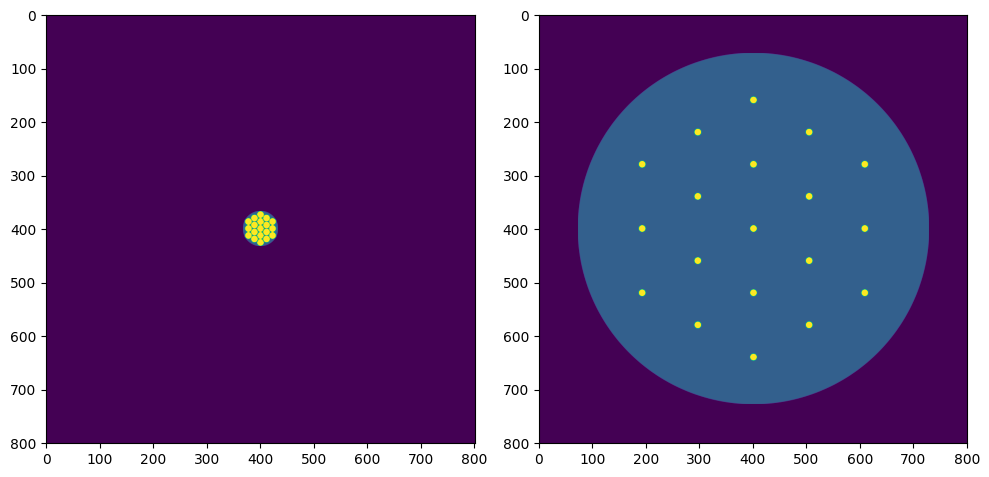

xg shape: (801, 801)
yg shape: (801, 801)
u0 shape: (267, 267)
input field: 


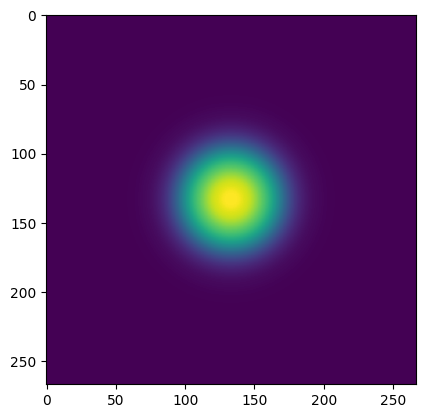

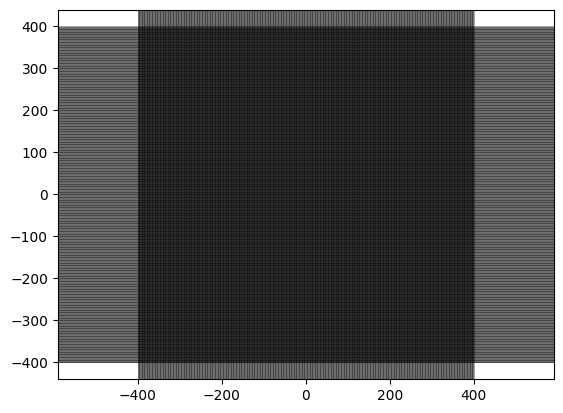

input power:  0.48592090651793235
propagating field...
initial shape:  (801, 801)
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
final total power 0.485926965974283
'prop2end_uniform'  195.6582 s
output field: 


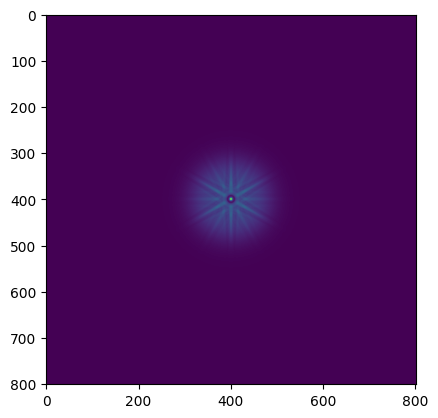

In [89]:
ds = 1 #um
dz = 0.5 #um
iw = 600 #um
zw = sm_offset #um
num_PML = 100 #grid units

_mesh = RectMesh3D(iw,iw,zw,ds,dz,num_PML)

lant19_ipos = optics2.lant19.get_19port_positions(core_spacing=sm_seperation_initial)
lant19_fpos = optics2.lant19.get_19port_positions(core_spacing=sm_seperation_final)

clad_sm = optics.scaled_cyl([0,0],sm_rclad,sm_offset,nclad,njack,scale_func=scale_func,final_scale=taper_ratio)
elmnts = [clad_sm]

for i in range(0,len(lant19_ipos)):
    core = optics2.scaled_cyl(xy=lant19_ipos[i],fxy=lant19_fpos[i] ,r = sm_rcore,z_ex = sm_offset,n = ncore,nb = nclad,z_offset=0,scale_func=scale_func,final_scale=1)
    elmnts.append(core)

lant19 = optics.OpticSys(elmnts,njack)
lant19.set_sampling(_mesh.xy)
out = np.zeros(_mesh.xy.shape)
# Create the figure and axes for the subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Generate the first subplot
lant19.set_IORsq(out, 0)
# axs[0].set_xlim([300,500])
# axs[0].set_ylim([300,500])
axs[0].imshow(out, vmin=njack*njack, vmax=ncore*ncore)

# Generate the second subplot
lant19.set_IORsq(out, 100)
# axs[1].set_xlim([300,500])
# axs[1].set_ylim([300,500])
axs[1].imshow(out, vmin=njack*njack, vmax=ncore*ncore)

# Display the figure with the subplots
plt.tight_layout()
plt.show()
xg, yg = _mesh.xg,_mesh.yg
# u0 = normalize(LPmodes.lpfield(xg,yg,l,m,mm_rclad,wl,nclad,njack))
print(f"xg shape: {xg.shape}")
print(f"yg shape: {yg.shape}")
print(f"u0 shape: {u0.shape}")

print("input field: ")
plt.imshow(np.abs(u0))
plt.show()
# _mesh.xy.refine_base(u0,ref_val)
# mm.set_sampling(_mesh.xy)
prop = Prop3D(wl,_mesh,lant19,nclad)
u1 = prop.prop2end_uniform(u0)
print("output field: ")
plt.imshow(np.abs(u1))
plt.show()